All theoretical explanations and the code provided here is in connection to the following papr:

[To be added the arxiv link]

# **A Short Summary of our PFL Framework**

Let $\Omega\subseteq\mathbb{R}$ and $X:\Omega\to\mathbb{R}$ be the identity random variable. Also, let $A$ be a fuzzy attribute of $\Omega$ (such as $low$, $medium$ and  $high$). Assume that $x_A\in\Omega$ certainly could not be selected as $A$. Hence, we interpret "selecting $x_A$ as $A$" as selecting nothing.  
We also define $\mathbb{P}(\Omega\text{ is } A)$ (or $\mathbb{P}(X\text{ is } A)$ ) to be the chance that a randomly chosen element of $\Omega$ has the attribute $A$. Indeed, $\mathbb{P}(\Omega \text{ is } A)$ is obtained in two steps:

(1) Randomly selecting an element $x$ of $\Omega$.

(2) Doing a random experiment for selected $x$ in Step (1) with the following outcomes:
\begin{equation}
\{\text{$x$ is selected as $A$}, \text{Nothing is selected as $A$}\}.
\end{equation}


Then, we associate the random variable $\xi_{X,A}$ to the above experiment. Indeed, $\xi_{X,A}$ takes $x\in\Omega\backslash\{x_A\}$ with the probability of $\mathbb{P}(X=x)\mathbb{P}(x\text{ is } A)$. 

# **Application of our PFL Framework in Causal Inference**

Assume that we intend to measure the causal effect of a discrete (but not necessarily binary) intervention $T$  on a Bernoulli outcome $Y$. For instance, $T$ could be a type of medical treatment and $Y$ be the outcome of $T$. Indeed, $Y=1$ when the treatment is successful and otherwise $Y=0$. We also denote the potential outcome corresponding to $T=t$ by $Y(t)$. A significant way to measure the causal effect of $T$ on $Y$ is to see the difference between the outcomes when $T$  is $high$ and when $T$ is $low$. We might be also interested in $medium$ treatments.  Thus, we assume that $low$, $medium$ and $high$ are fuzzy attributes of $T$, and then we use our PFL theory. Given a statistical population, we define:
\begin{equation}
  Y(A):=\frac{1}{\mathbb{P}(T\text{ is }A)}\sum_{t\neq t_A}Y(t)\mathbb{P}(\xi_{T,A}=t),
\end{equation}
where $A\in\{low, medium, high\}$. 

Now, we define the *fuzzy average treatment effects (FATE)* as follows:
\begin{align*}
	\mathrm{FATE}_{l}^{h}&:=\mathbb{E}(Y(high))-\mathbb{E}(Y(low)),\\
	\mathrm{FATE}_{l}^{m}&:=\mathbb{E}(Y(medium))-\mathbb{E}(Y(low)),\\
	\mathrm{FATE}_{m}^{h}&:=\mathbb{E}(Y(high))-\mathbb{E}(Y(medium)).
\end{align*}
Obviously, we have that
\begin{equation}
\mathrm{FATE}_{l}^{h}=\mathrm{FATE}_{l}^{m}+\mathrm{FATE}_{m}^{h}.
\end{equation}
We note that to measure the causal effect of the treatment on a unit, we have to do the following procedure: Given the times $t_1$ and $t_2$ with $t_1<t_2$, for any treatment $t$, the unit receives $t$ at the time $t_1$, and $Y(t)$ (the potential outcome associated to $t$) is measured at the time $t_2$. However, it is not possible to measure all potential outcomes for a unit simultaneously.  Hence, for a period of time, only one of the above potential outcomes could be measured for a unit, and the other ones remain missing. This issue is called the *fundamental problem of Causal Inference*.

To deal with the fundamental problem of Causal Inference, there are some assumptions in classic causal inference such as  the ignorability condition. Similar assumptions, could create a fuzzy version of  the ignorability condition.  Our fuzzy ignorability condition is the following assumption:

$\bullet$ $Y(t)$ and $\xi_{A,T}$ are independent for any $t\in T$ and $A\in\{low, high\}$. 

Thus, to compute $\mathrm{FATE}_l^h$,  we have that
\begin{align*}
	\mathbb{E}(Y(high))&=\frac{1}{\mathbb{P}(T\text{ is }high)}\sum_{t\neq t_{high}}\mathbb{E}(Y(t))\mathbb{P}(\xi_{T,high}=t)\\
	&=\frac{1}{\mathbb{P}(T\text{ is }high)}\sum_{t\neq t_{high}}\mathbb{E}(Y(t)|\xi_{T,high}=t)\mathbb{P}(\xi_{T,high}=t)\\
	&=\frac{1}{\mathbb{P}(T\text{ is }high)}\sum_{t\neq t_{high}}\mathbb{P}(Y(t)=1|\xi_{T,high}=t)\mathbb{P}(\xi_{T,high}=t)\\
	&=\frac{1}{\mathbb{P}(T\text{ is }high)}\sum_{t\neq t_{high}}\mathbb{P}(Y=1|\xi_{T,high}=t)\mathbb{P}(\xi_{T,high}=t)\\
	&=\frac{1}{\mathbb{P}(\xi_{T,high}\neq t_{high})}\sum_{t\neq t_{high}}\mathbb{P}(\xi_{T,high}=t|Y=1)\mathbb{P}(Y=1)\\
	&=\frac{\mathbb{P}(\xi_{T,high}\neq t_{high}|Y=1)\mathbb{P}(Y=1)}{\mathbb{P}(\xi_{T,high}\neq t_{high})}\\
	&=\mathbb{P}(Y=1|\xi_{T,high}\neq t_{high})\\
	&=\mathbb{E}(Y|\xi_{T,high}\neq t_{high}).
\end{align*}
which is a statistical formula. Similarly, we can obtain $\mathbb{E}(Y(low))$ as follows:
\begin{equation}
\mathbb{E}(Y(low))=\mathbb{E}(Y|\xi_{T,low}\neq t_{low}),
\end{equation}
which implies that
\begin{equation}
  \mathrm{FATE}_l^h=\mathbb{E}(Y|\xi_{T,high}\neq t_{high})-\mathbb{E}(Y|\xi_{T,low}\neq t_{low}).
\end{equation}

In practice,  we suggest to fuzzify the treatment into three fuzzy subsets $low$, $medium$ and $high$ in such a way that 
\begin{equation}
\mathbb{P}(t\text{ is }low)+\mathbb{P}(t\text{ is }medium)+\mathbb{P}(t\text{ is }high)=1
\end{equation}
for any $t\in \mathrm{Supp}(T)\backslash\{t_{high}\}$ (for instance, see Relative Fuzzy Model described in the paper). This follows that
\begin{equation}
\mathbb{P}(T\text{ is }low)+\mathbb{P}(T\text{ is }medium)+\mathbb{P}(T\text{ is }high)=1.
\end{equation}
Then, for any treatment $t\in \mathrm{Supp}(T)\backslash\{t_{high}\}$, we randomly assign $t$ to a proportion $\mathbb{P}(\xi_{T,high}=t)$ of the entire sample. Thus, a proportion  $\mathbb{P}(T\text{ is }low)+\mathbb{P}(T\text{ is }medium)$ of the entire sample is untreated. Next, we randomly assign  $\xi_{T,medium}$ to a proportion  $\mathbb{P}(T\text{ is }medium)$ of the entire sample, but only to untreated units. Thus, a proportion $\mathbb{P}(T\text{ is }low)$ of the entire sample remains untreated. This proportion of the entire sample could be treated using $\xi_{T,low}$.


Now, let's see an example. assume that we are given a uniformly distributed treatment $T$ whose set of values is $\{0,1,\ldots,9\}$. We randomly generate the binary potential outcomes of a sample of 10000 people in such a way that the probability of happening $Y(t)=1$ is more probable when $t$ increases. The goal is to check that the fuzzy version of the ignorability condition solves the fundamental problem of Causal Inference.

The codes appearing below describes the aforementioned example. For precise information see the paper. 

In [ ]:
import numpy as np
import pandas as pd

# Part 1: Direct Computing of Fuzzy Average Treatment Effect

**`Generating Random Data`**

In [ ]:
card_tr=10 #The cardinality of the treatment set. Indeed, Supp(T)={0,1,...,card_tr-1}
card_smpl=10000  #The cardinality of the sample

In [ ]:
# Generating the "card_smpl*card_tr" array "pop" in such a way that each row corresponds to a unit.
# The jth entry in the ith row is the value of the jth binary potential outcome for the ith unit.
# The probability of happening $Y(j)=1$ is more probable when $j$ increases.

np.random.seed(1)
pop=np.zeros((card_smpl, card_tr))
for i in range(0,card_smpl):
  for j in range(0, card_tr):
    pop[i,j]=np.random.choice(2,1,p=[1-((j+1)**2/((card_tr+1)**2)),(j+1)**2/((card_tr+1)**2)])


In [ ]:
# Showing the tail and the head of Data

pot=[]
for i in range(0,card_tr):
  pot.append("Y("+str(i)+")")

table=pd.DataFrame(pop,columns=pot)
table

,Y(0),Y(1),Y(2),Y(3),Y(4),Y(5),Y(6),Y(7),Y(8),Y(9)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


Defining fuzzy attributes "low", "medium" and "high"

In [ ]:
# low(x) is the degree of x being "low"

def low(x):
  if x>=0 and x<=(card_tr-1)/2:
    temp=(-2*x/(card_tr-1))+1
  else:
    temp=0
  return(temp)

# med(x) is the degree of x being "medium"

def med(x):
  if x>=0 and x<=(card_tr-1)/2:
    temp=2*x/(card_tr-1)
  elif x>=(card_tr-1)/2 and x<=card_tr:
    temp=(-2*x/(card_tr-1))+2
  else:
    temp=0
  return(temp)

# high(x) is the degree of x being "high"

def high(x):
  if x>=(card_tr-1)/2 and x<=card_tr-1:
    temp=(2*x/(card_tr-1))-1
  else:
    temp=0
  return(temp)

In [ ]:
import matplotlib.pyplot as plt

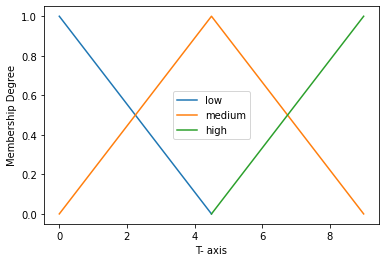

In [ ]:
# Plotting the fuzzy sets associated to "low", "medium" and "high".

# T axis values
T1 = [0,(card_tr-1)/2]
T2 = [0, (card_tr-1)/2, card_tr-1]
T3 = [(card_tr-1)/2, card_tr-1]
# Corresponding y axis values
y1 = [1,0]
y2 = [0, 1, 0]
y3 = [0, 1]
 
# Plotting the points
plt.plot(T1, y1, label = "low")
plt.plot(T2, y2, label = "medium")
plt.plot(T3, y3, label = "high")
# Naming the x axis
plt.xlabel('T- axis')
# Naming the y axis
plt.ylabel('Membership Degree')
plt.legend()
 
# Function to show the plot
plt.show()

Computing Fuzzy Average Treatment Effect (FATE)

In [ ]:
# A row (pr_pot_outcome) with card_tr enteries such that the jth entery is E(Y(j))=Pr(Y(j)=1).

pr_pot_outcome=pop.sum(axis=0)/card_smpl

In [ ]:
# Calculating E(Y(low)) (=ex_pot_low).
# Here "T_is_low" is the sum of low(0)+ ... +low(card_tr-1).
# We note that P(T is low)=T_is_low/card_smpl.

ex_pot_low=0
T_is_low=0

for j in range(0,card_tr):
  T_is_low+=low(j)
  ex_pot_low+=pr_pot_outcome[j]*low(j)

ex_pot_low=ex_pot_low/T_is_low

# Calculating E(Y(medium)) (=ex_pot_med).
# Here "T_is_med" is the sum of med(0)+ ... +med(card_tr-1).

ex_pot_med=0
T_is_med=0

for j in range(0,card_tr):
  T_is_med+=med(j)
  ex_pot_med+=pr_pot_outcome[j]*med(j)

ex_pot_med=ex_pot_med/T_is_med

# Calculating E(Y(high)) (=ex_pot_high).
# Here "T_is_high" is the sum of high(0)+ ... +high(card_tr-1).

ex_pot_high=0
T_is_high=0

for j in range(0,card_tr):
  T_is_high+=high(j)
  ex_pot_high+=pr_pot_outcome[j]*high(j)

ex_pot_high=ex_pot_high/T_is_high

In [ ]:
# Computing FATE.

FATE_lm=ex_pot_med-ex_pot_low
FATE_lh=ex_pot_high-ex_pot_low

print("FATE_l^m=", FATE_lm)
print("FATE_l^h=", FATE_lh)

FATE_l^m= 0.22724099999999997
FATE_l^h= 0.5987880000000001


## Part 2: Computing Fuzzy Treatment Effect Using the Ignorability Condition

Computing the Probability Values of Assigning Different Treatments

In [ ]:
# Comouting Pr(xi_{T,A}=t)/Pr(T is A) for any t, and the attribute A in {"low", "med", "high"}.
# A vector with card_tre enteries is computed whose jth entery is Pr(xi_{T,A}=j)/Pr(T is A).

pr_low=np.zeros(card_tr)
pr_med=np.zeros(card_tr)
pr_high=np.zeros(card_tr)
for j in range(0,card_tr):
  pr_low[j]=low(j)/T_is_low
  pr_med[j]=med(j)/T_is_med
  pr_high[j]=high(j)/T_is_high



Randomly Assigning the Treatments and Computing Conditioanl Expcted Values of the Observed Outcome Given the "low", "medium" and "high" Treatments

In [ ]:
# Computing the number of units that would be treated by different treatments.
# For any A in {"low", "medium", "high"}, a vector with card_tre entries is computed. 
# The jth entry of this vector is the number of units receiving T=j as A.  

nr_low=divmod(pr_low*T_is_low*card_smpl/card_tr,1)[0]
nr_med=divmod(pr_med*T_is_med*card_smpl/card_tr,1)[0]
nr_high=divmod(pr_high*T_is_high*card_smpl/card_tr,1)[0]

In [ ]:
import random

In [ ]:
# Randomly assigning the "low" treatments to units. Indeed, the selected units in our sample are aggregated in the list "select_agg".

random.seed(1)
select_low=[]
select_agg=[]
for j in range(0,card_tr):
  temp_l1=[]
  while len(temp_l1)<nr_low[j]:
        temp_1=random.randint(0,card_smpl-1)
        if  temp_1 not in select_agg:
               temp_l1.append(temp_1)
               select_agg.append(temp_1)
  select_low.append(temp_l1)


In [ ]:
# Computing E(Y|\xi_{T,low}!=t_{low}).

exp_y_low=0
for j in range(0,card_tr):
  temp_2=0
  for i in select_low[j]:
    temp_2+=pop[i,j]
  if nr_low[j]>0:
     exp_y_low+=((temp_2*low(j))/nr_low[j])
exp_y_low=exp_y_low/T_is_low

In [ ]:
# Randomly assigning the "medium" treatments to units. Indeed, the selected units are added to "select_agg".


select_med=[]
for j in range(0,card_tr):
  temp_l2=[]
  while len(temp_l2)<nr_med[j]:
        temp_3=random.randint(0,card_smpl-1)
        if  temp_3 not in select_agg:
               temp_l2.append(temp_3)
               select_agg.append(temp_3)
  select_med.append(temp_l2)



In [ ]:
# Computing E(Y|\xi_{T,medium}!=t_{medium}).

exp_y_med=0
for j in range(0,card_tr):
  temp_2=0
  for i in select_med[j]:
    temp_2+=pop[i,j]
  if nr_med[j]>0:
     exp_y_med+=((temp_2*med(j))/nr_med[j])
exp_y_med=exp_y_med/T_is_med

In [ ]:
# Randomly assigning the "high" treatments to units. Indeed, the selected units are added to "select_agg".

select_high=[]

for j in range(0,card_tr):
  temp_l1=[]
  while len(temp_l1)<nr_high[j]:
        temp_1=random.randint(0,card_smpl-1)
        if  temp_1 not in select_agg:
               temp_l1.append(temp_1)
               select_agg.append(temp_1)
  select_high.append(temp_l1)

In [ ]:
# Computing E(Y|\xi_{T,high}!=t_{high}).

exp_y_high=0
for j in range(0,card_tr):
  temp_2=0
  for i in select_high[j]:
    temp_2+=pop[i,j]
  if nr_high[j]>0:
     exp_y_high+=((temp_2*high(j))/nr_high[j])
exp_y_high=exp_y_high/T_is_high

In [ ]:
# Computing FATE_l^h.

exp_y_high-exp_y_low

0.5981981981981981

In [ ]:
# Computing FATE_m^h.

exp_y_med-exp_y_low

0.22702702702702707